In [1]:
import pandas as pd

In [2]:
scotch_df = pd.read_csv('./scotch_review.csv')

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv

### Above I installed necessary libaries, then imported necessary modules and also define scotch_df as review csv file of scotchs.

### Below you can see data shape, first five rows of the data set, colounms, description and info

In [4]:
print(f"Data Shape: {scotch_df.shape}")

Data Shape: (2247, 7)


In [5]:
print(scotch_df.columns)

Index(['Unnamed: 0', 'name', 'category', 'review.point', 'price', 'currency',
       'description'],
      dtype='object')


In [6]:
scotch_df.head(5)

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [7]:
print(scotch_df.describe)

<bound method NDFrame.describe of       Unnamed: 0                                               name  \
0              1                     Johnnie Walker Blue Label, 40%   
1              2    Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2              3        Bowmore 46 year old (distilled 1964), 42.9%   
3              4                     Compass Box The General, 53.4%   
4              5                            Chivas Regal Ultis, 40%   
...          ...                                                ...   
2242        2243  Duncan Taylor (distilled at Cameronbridge), Ca...   
2243        2244  Distillery Select 'Craiglodge' (distilled at L...   
2244        2245         Edradour Barolo Finish, 11 year old, 57.1%   
2245        2246  Highland Park, Cask #7380, 1981 vintage, 25 ye...   
2246        2247  Distillery Select 'Inchmoan' (distilled at Loc...   

                        category  review.point     price currency  \
0          Blended Scotch Whisky            

In [8]:
print(scotch_df.info)

<bound method DataFrame.info of       Unnamed: 0                                               name  \
0              1                     Johnnie Walker Blue Label, 40%   
1              2    Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2              3        Bowmore 46 year old (distilled 1964), 42.9%   
3              4                     Compass Box The General, 53.4%   
4              5                            Chivas Regal Ultis, 40%   
...          ...                                                ...   
2242        2243  Duncan Taylor (distilled at Cameronbridge), Ca...   
2243        2244  Distillery Select 'Craiglodge' (distilled at L...   
2244        2245         Edradour Barolo Finish, 11 year old, 57.1%   
2245        2246  Highland Park, Cask #7380, 1981 vintage, 25 ye...   
2246        2247  Distillery Select 'Inchmoan' (distilled at Loc...   

                        category  review.point     price currency  \
0          Blended Scotch Whisky            97

### Below I create the rank of scotch by description according review points and it is sorted by review points

In [9]:
ranked_scotch = scotch_df[['description', 'review.point']].sort_values(by='review.point')

In [10]:
ranked_scotch

,description,review.point
2246,"Fiery peat kiln smoke, tar, and ripe barley on...",63
2245,"The sherry is very dominant and cloying, which...",70
2244,"Earthy, fleshy notes with brooding grape notes...",70
2243,"Aged in a sherry cask, which adds sweet notes ...",71
2242,"Its best attributes are vanilla, toasted cocon...",72
...,...,...
12,A remarkable beauty from the Angus town of Mon...,96
7,"Definitely showing its age, but not in a bad w...",96
2,There have been some legendary Bowmores from t...,97
1,What impresses me most is how this whisky evol...,97


### Below I find avarage and mean values to have better understanding of reviews points and to be able to give sentiment to reviews

In [11]:
ranked_scotch['review.point'].median()

87.0

### the most common review.point

In [12]:
ranked_scotch['review.point'].mode()

0    87
dtype: int64

In [13]:
ranked_scotch['review.point'].mean()

86.70004450378282

### Above median, mean and mode results, pretty much i understand where is pozitif , negative and nautural, however I would like to check regression to decide it more precisely.


### Below I find the count of each value so I make new two columns to draw regression

In [14]:
regression_scotch = ranked_scotch['review.point'].value_counts()



### Below I create coloumns for regression_scotch

In [15]:
rs=ranked_scotch.groupby(['review.point'],as_index=False).count()
rs

,review.point,description
0,63,1
1,70,2
2,71,1
3,72,4
4,73,2
5,74,2
6,75,3
7,76,3
8,77,12
9,78,18


In [16]:
rs = rs.rename(columns={'review.point': 'points', 'description': 'count'})

In [17]:
rs

,points,count
0,63,1
1,70,2
2,71,1
3,72,4
4,73,2
5,74,2
6,75,3
7,76,3
8,77,12
9,78,18


In [18]:
X = rs['points'].values
y = rs['count'].values

In [19]:
X

array([63, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [20]:
X=X.reshape(-1,1)
X

array([[63],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90],
       [91],
       [92],
       [93],
       [94],
       [95],
       [96],
       [97]])

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=10)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (23, 1)
y_train shape (23,)
X_test shape (6, 1)
y_test shape (6,)
[141   3   2   1  24 197]


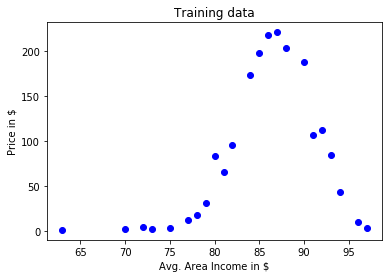

In [23]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Avg. Area Income in $' )
plt.ylabel('Price in $')
plt.title('Training data')
plt.show()

In [24]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 16.85 %
Test accuracy 21.63 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

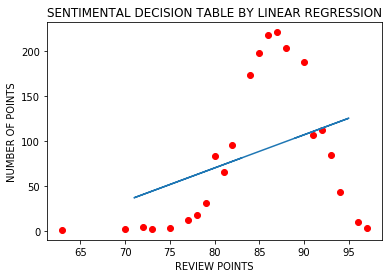

In [25]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

### Also I will check by Polyregression as below

In [26]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

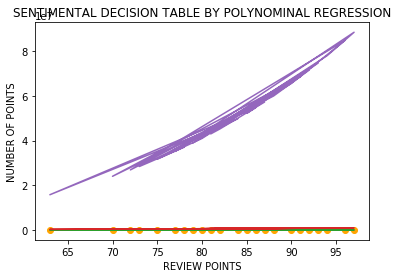

In [27]:
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

### range calcutaion to compare with linear regression and polynominal regression

In [28]:
range = 97 - 63
range

34

In [29]:
round(range/3)

11

### According comparing linear regression, polynominal regression and range calculation method, i write create_sentiment function below

In [30]:
def create_sentiment(int):
    if int >=63 and int<80:
        return 0
    if int>=80 and int<90:
        return 1
    if int>=90 and int<98:
        return 2

In [31]:
ranked_scotch['sentiment'] = ranked_scotch['review.point'].apply(create_sentiment)

### in above line i add sectiment column to my dataframe according create_sentiment function.So each description according review point has own perseption of being positve, negative or natural.

### below it is seen with new sentiment column

In [32]:
ranked_scotch

,description,review.point,sentiment
2246,"Fiery peat kiln smoke, tar, and ripe barley on...",63,0
2245,"The sherry is very dominant and cloying, which...",70,0
2244,"Earthy, fleshy notes with brooding grape notes...",70,0
2243,"Aged in a sherry cask, which adds sweet notes ...",71,0
2242,"Its best attributes are vanilla, toasted cocon...",72,0
...,...,...,...
12,A remarkable beauty from the Angus town of Mon...,96,2
7,"Definitely showing its age, but not in a bad w...",96,2
2,There have been some legendary Bowmores from t...,97,2
1,What impresses me most is how this whisky evol...,97,2


### when I check description i see too many comas in description so I decide to clean comas with below function

In [33]:
def clean_comas(str):
    return str.replace(',', ';')

In [34]:
ranked_scotch['description'] = ranked_scotch['description'].apply(clean_comas)

In [35]:
ranked_scotch

,description,review.point,sentiment
2246,Fiery peat kiln smoke; tar; and ripe barley on...,63,0
2245,The sherry is very dominant and cloying; which...,70,0
2244,Earthy; fleshy notes with brooding grape notes...,70,0
2243,Aged in a sherry cask; which adds sweet notes ...,71,0
2242,Its best attributes are vanilla; toasted cocon...,72,0
...,...,...,...
12,A remarkable beauty from the Angus town of Mon...,96,2
7,Definitely showing its age; but not in a bad w...,96,2
2,There have been some legendary Bowmores from t...,97,2
1,What impresses me most is how this whisky evol...,97,2


### below line make a new ready csv file to be workable for machine learning

In [59]:
ranked_scotch.to_csv('ranked_scotch.csv')

In [60]:
ranked_scotch

,description,review.point,sentiment
2246,Fiery peat kiln smoke; tar; and ripe barley on...,63,0
2245,The sherry is very dominant and cloying; which...,70,0
2244,Earthy; fleshy notes with brooding grape notes...,70,0
2243,Aged in a sherry cask; which adds sweet notes ...,71,0
2242,Its best attributes are vanilla; toasted cocon...,72,0
...,...,...,...
12,A remarkable beauty from the Angus town of Mon...,96,2
7,Definitely showing its age; but not in a bad w...,96,2
2,There have been some legendary Bowmores from t...,97,2
1,What impresses me most is how this whisky evol...,97,2


In [61]:
scotch_df = pd.read_csv('ranked_scotch.csv')

In [62]:
scotch_df

,Unnamed: 0,description,review.point,sentiment
0,2246,Fiery peat kiln smoke; tar; and ripe barley on...,63,0
1,2245,The sherry is very dominant and cloying; which...,70,0
2,2244,Earthy; fleshy notes with brooding grape notes...,70,0
3,2243,Aged in a sherry cask; which adds sweet notes ...,71,0
4,2242,Its best attributes are vanilla; toasted cocon...,72,0
...,...,...,...,...
2242,12,A remarkable beauty from the Angus town of Mon...,96,2
2243,7,Definitely showing its age; but not in a bad w...,96,2
2244,2,There have been some legendary Bowmores from t...,97,2
2245,1,What impresses me most is how this whisky evol...,97,2


In [63]:
scotch_df.columns=['Unnamed: 0', 'description' , 'review.point' , 'sentiment']
scotch_training_df = scotch_df[['description', 'sentiment']].dropna()
scotch_training_df.sample(5)

,description,sentiment
399,A spicier character to represent 1920s Bombay ...,1
2053,The first Batch Strength expression of Tamdhu ...,2
285,A broad and humid aroma; like walking through ...,1
811,The first Lowland single malt bottling to be m...,1
52,This is coming from a first fill sherry hogshe...,0


In [64]:
scotch_y = scotch_training_df.sentiment
print(scotch_y)

0       0
1       0
2       0
3       0
4       0
       ..
2242    2
2243    2
2244    2
2245    2
2246    2
Name: sentiment, Length: 2247, dtype: int64


In [65]:
scotch_x = scotch_training_df.description
print(scotch_x)

0       Fiery peat kiln smoke; tar; and ripe barley on...
1       The sherry is very dominant and cloying; which...
2       Earthy; fleshy notes with brooding grape notes...
3       Aged in a sherry cask; which adds sweet notes ...
4       Its best attributes are vanilla; toasted cocon...
                              ...                        
2242    A remarkable beauty from the Angus town of Mon...
2243    Definitely showing its age; but not in a bad w...
2244    There have been some legendary Bowmores from t...
2245    What impresses me most is how this whisky evol...
2246    Magnificently powerful and intense. Caramels; ...
Name: description, Length: 2247, dtype: object


### above I define x and y axis of my analysis x axis is description and y axis is sentiment

In [66]:
scotch_training_df.describe()

,sentiment
count,2247.000000
mean,1.218959
std,0.491365
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [67]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(scotch_x)

In [68]:
scotch_x = tokenizer.texts_to_sequences(scotch_x)
scotch_x

[[1659,
  41,
  733,
  25,
  307,
  1,
  97,
  169,
  10,
  2,
  15,
  62,
  1053,
  127,
  19,
  62,
  3,
  2191,
  1554,
  10,
  2,
  12,
  2,
  16,
  650,
  104,
  2792,
  402,
  19,
  50,
  356,
  12,
  2,
  16,
  957,
  2793,
  1,
  3285,
  5,
  5404,
  1,
  1106,
  14,
  28,
  443,
  138,
  9,
  2,
  11,
  170,
  9,
  3948,
  1054,
  1,
  1462,
  35],
 [2,
  23,
  7,
  32,
  651,
  1,
  842,
  75,
  7,
  3286,
  1,
  533,
  62,
  5405,
  331,
  2,
  523,
  4,
  2,
  23,
  166,
  572,
  184,
  2,
  93,
  13,
  59,
  109,
  6,
  72,
  101,
  203,
  2794,
  22,
  413,
  246,
  344,
  1,
  983,
  19,
  8,
  7,
  534,
  5406,
  22,
  3,
  246,
  344,
  553,
  2795,
  5,
  2,
  398,
  2192,
  134,
  22,
  983,
  871,
  872,
  35],
 [213,
  1014,
  14,
  5,
  1555,
  586,
  14,
  1,
  3,
  3949,
  11,
  2,
  5407,
  586,
  438,
  7,
  1107,
  72,
  667,
  2433,
  195,
  1,
  72,
  667,
  1814,
  16,
  19,
  2,
  84,
  6,
  8,
  16,
  188,
  49,
  391,
  1,
  71,
  170,
  9,
  983,
  871

### Above I create array that texts of description tokenized and
### Below I create the Matrix of it

In [69]:
scotch_x = tokenizer.sequences_to_matrix(scotch_x)
scotch_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [70]:
print(type(scotch_x))

<class 'numpy.ndarray'>
